In [12]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating Area Under Curve for ROC's!

pd.set_option('display.max_columns', 500)

seed = 420

In [13]:
# Read data from URL

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
shroomNames = ['class', 'capShape', 'capSurface', 'capColor', 'bruises', 
         'odor', 'gillAttachment', 'gillSpacing', 'gillSize', 
         'gillColor', 'stalkShape', 'stalkRoot', 'stalkSurfaceAboveRing', 
         'stalkSurfaceBelowRing', 'stalkColorAboveRing', 'stalkColorBelowRing', 
         'veilType', 'veilColor', 'ringNumber', 'ringType', 'sporePrintColor', 
         'population', 'habitat']

mushrooms = pd.read_csv(urlopen(url), names = shroomNames, index_col  = False)
mushrooms.head()
        

,class,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,stalkShape,stalkRoot,stalkSurfaceAboveRing,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [14]:
# Converting into dummy variables
dummyMushrooms = pd.get_dummies(mushrooms, prefix = shroomNames)
del dummyMushrooms['class_p']
dummyMushrooms.head()


,class_e,capShape_b,capShape_c,capShape_f,capShape_k,capShape_s,capShape_x,capSurface_f,capSurface_g,capSurface_s,capSurface_y,capColor_b,capColor_c,capColor_e,capColor_g,capColor_n,capColor_p,capColor_r,capColor_u,capColor_w,capColor_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gillAttachment_a,gillAttachment_f,gillSpacing_c,gillSpacing_w,gillSize_b,gillSize_n,gillColor_b,gillColor_e,gillColor_g,gillColor_h,gillColor_k,gillColor_n,gillColor_o,gillColor_p,gillColor_r,gillColor_u,gillColor_w,gillColor_y,stalkShape_e,stalkShape_t,stalkRoot_?,stalkRoot_b,stalkRoot_c,stalkRoot_e,stalkRoot_r,stalkSurfaceAboveRing_f,stalkSurfaceAboveRing_k,stalkSurfaceAboveRing_s,stalkSurfaceAboveRing_y,stalkSurfaceBelowRing_f,stalkSurfaceBelowRing_k,stalkSurfaceBelowRing_s,stalkSurfaceBelowRing_y,stalkColorAboveRing_b,stalkColorAboveRing_c,stalkColorAboveRing_e,stalkColorAboveRing_g,stalkColorAboveRing_n,stalkColorAboveRing_o,stalkColorAboveRing_p,stalkColorAboveRing_w,stalkColorAboveRing_y,stalkColorBelowRing_b,stalkColorBelowRing_c,stalkColorBelowRing_e,stalkColorBelowRing_g,stalkColorBelowRing_n,stalkColorBelowRing_o,stalkColorBelowRing_p,stalkColorBelowRing_w,stalkColorBelowRing_y,veilType_p,veilColor_n,veilColor_o,veilColor_w,veilColor_y,ringNumber_n,ringNumber_o,ringNumber_t,ringType_e,ringType_f,ringType_l,ringType_n,ringType_p,sporePrintColor_b,sporePrintColor_h,sporePrintColor_k,sporePrintColor_n,sporePrintColor_o,sporePrintColor_r,sporePrintColor_u,sporePrintColor_w,sporePrintColor_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
# Create training and test sets

trainSize = 0.70
train, test = train_test_split(dummyMushrooms, 
                               train_size = trainSize, 
                               test_size = (1 - trainSize),
                               random_state = 420)

print(dummyMushrooms.shape[0], "rows in the orginal dataset")
print(train.shape[0], "rows in the training set.")
print(test.shape[0], "rows in the testing set.")

8124 rows in the orginal dataset
5686 rows in the training set.
2438 rows in the testing set.


In [16]:
# Setting up the algorithm

model1 = MultinomialNB()
model1.fit(X = train.ix[:,train.columns != 'class_e'],
           y = train.ix[:,train.columns == 'class_e'])

classlessTrain = train.ix[:,train.columns != 'class_e']
classSet = train.ix[:,train.columns == 'class_e']

print(model1.coef_)

[[ -5.47553675 -11.07765557  -4.05122877  -5.98390537  -7.94216136
   -3.86388727  -4.07823311 -11.07765557  -4.40057211  -4.12206297
   -7.52230751  -7.78181871  -4.97286234  -4.47642546  -4.32421766
   -7.41409393  -8.880431    -8.43859824  -4.85309715  -5.45725471
   -4.15107854  -3.51809608  -5.47185351 -11.07765557 -11.07765557
   -5.46818378 -11.07765557  -3.29693469 -11.07765557 -11.07765557
  -11.07765557  -6.22562531  -3.13671581  -3.43177975  -4.33713621
   -3.16121271  -5.79954092 -11.07765557  -6.80098946  -5.99005924
   -6.07370927  -5.60959543  -4.64150521  -7.29346594  -4.66583731
  -11.07765557  -5.33465239  -4.54096398  -7.22750797  -4.05746487
   -3.5716134   -4.85309715  -3.87127828  -5.21118752  -4.67242712
   -6.21012112  -5.39748297  -6.40482674  -3.24168099  -8.77507048
   -5.30621445  -6.44292659  -3.30406111  -6.14318164 -11.07765557
  -11.07765557  -6.91877249  -5.01387037  -8.77507048  -6.22562531
   -5.14541039  -3.5108271  -11.07765557 -11.07765557 -11.0776

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Predicting the class for the training set
predictions = model1.predict(classlessTrain)

# Creates a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictions, classSet['class_e'], 
                  rownames=['Predicted Values'], colnames=['Actual Values']))

# Measure the accuracy based on the training set
accuracyTrain = model1.score(classlessTrain, classSet['class_e'])

print("Here is our accuracy for our training set:")
print('%.3f' % (accuracyTrain * 100), '%')


Actual Values        0     1
Predicted Values            
0                 2499    18
1                  251  2918
Here is our accuracy for our training set:
95.269 %


In [18]:
print ("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain
print('%.3f' % (train_error_rate * 100), '%')

The train error rate for our model is:
4.731 %


In [19]:
# Test set evaluations

test_set = test.ix[:, test.columns != 'class_e']
test_class_set = test.ix[:, test.columns == 'class_e']

# Predict the Dx for the test set and call it predictions
predictions = model1.predict(test_set)

# Let's compare the predictions vs. the actual values
print(pd.crosstab(predictions, test_class_set['class_e'],
                  rownames=['Predicted Values'],
                  colnames=['Actual Values']))

# Getting accuracy of test set
accuracy = model1.score(test_set, test_class_set['class_e'])

# Test error rate
print ("Here is our accuracy for our test set:")
print ('%.3f' % (accuracy * 100), '%')

Actual Values        0     1
Predicted Values            
0                 1071     8
1                   95  1264
Here is our accuracy for our test set:
95.775 %


In [20]:
# Calculating the test error rate!
print("The test error rate for our model is:")
test_error_rate = 1 - accuracy
print('%.3f' % (test_error_rate * 100), '%')

The test error rate for our model is:
4.225 %


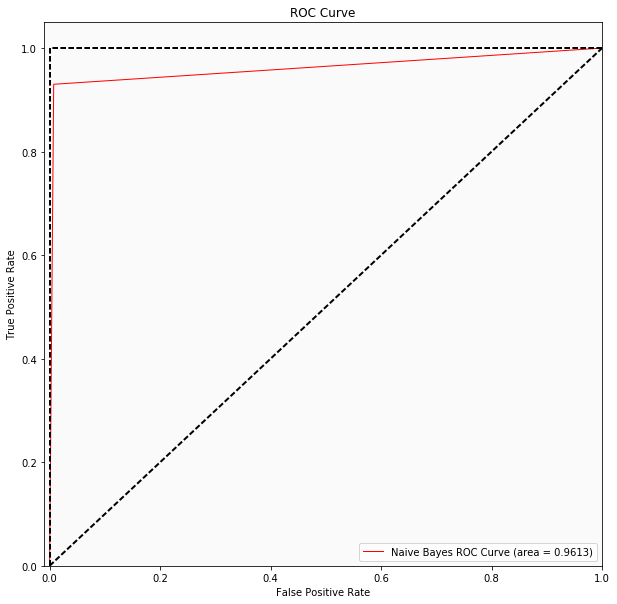

In [24]:
# Calculating for ROC Curves
fpr, tpr, _= roc_curve(predictions, test_class_set)

# Area under curve
auc_nb = auc(fpr, tpr)

# Plotting curve
fig, ax = plt.subplots (figsize = (10, 10))

plt.plot(fpr, tpr, label='Naive Bayes ROC Curve (area = %.4f)' % auc_nb,
         color = 'red',
         linewidth = 1)

ax.set_facecolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()
